In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
mnist.keys() # dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
digit1 = mnist['data'].loc[0]

In [6]:
type(digit1)

pandas.core.series.Series

In [7]:
arr1 = digit1.values

In [8]:
type(arr1)

numpy.ndarray

In [9]:
arr1_reshape = arr1.reshape(28,28)

In [ ]:
plt.imshow(arr1_reshape, cmap='binary')

In [11]:
def pick_a_digit(row):
  digit = mnist['target'].loc[row]
  print("the digit at ", row ," is ", mnist['target'].loc[row])
  return digit

def show_a_digit(row):
  num_data = mnist['data'].loc[row]
  num2d = num_data.values.reshape(28,28)
  plt.imshow(num2d, cmap='binary')
    
def pick_and_show_a_digit(row):
    digit = mnist['data'].loc[row]
    arr1_reshape = digit.values.reshape(28,28)
    print("at row ", row, "is ", mnist['target'].loc[row])
    plt.imshow(arr1_reshape, cmap='binary')
    return digit

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
n3 = pick_a_digit(3)
n100 = pick_a_digit(100)

data = mnist['data']
print(len(data))
target = mnist['target']
train_data = data[:60000]; train_target = target[:60000];
test_data = data[60000:]; test_target = target[60000:]

In [ ]:
num_data = mnist['data'].loc[3]
num2d = num_data.values.reshape(28,28)
plt.imshow(num2d, cmap='binary')

In [ ]:
show_a_digit(3)

In [54]:
is5_train_target = (train_target == '5')

In [55]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_data, is5_train_target) # executed for 25 seconds

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([digit1.values])

In [ ]:
the10_digit = pick_and_show_a_digit(10)

In [ ]:
sgd_clf.predict([the10_digit])

In [12]:
x = np.array([1,2,3,4,5])

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
is5_sgd_clf = sgd_clf
cross_val_score(is5_sgd_clf, train_data, is5_train_target, cv=4, scoring="accuracy") # 精度

array([0.95766667, 0.9664    , 0.96513333, 0.95366667])

In [1]:
plot_digits(train_data[:20], images_per_row=10)
plt.show()

NameError: name 'plot_digits' is not defined

In [13]:
from sklearn.base import BaseEstimator

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [ ]:
cross_val_score(DummyClassifier(), train_data, is5_train_target, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [16]:
from sklearn.model_selection import cross_val_predict
is5_train_predict = cross_val_predict(is5_sgd_clf, train_data, is5_train_target, cv=3) # 输出的是True, False

NameError: name 'is5_sgd_clf' is not defined

In [14]:
from sklearn.metrics import confusion_matrix
is5_conf_matrix = confusion_matrix(is5_train_predict, is5_train_target)
is5_conf_matrix

NameError: name 'is5_train_predict' is not defined

In [77]:
def get_matrix():
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix
    is5_train_predict = cross_val_predict(is5_sgd_clf, train_data, is5_train_target, cv=3) # 输出的是True, False
    is5_conf_matrix = confusion_matrix(is5_train_predict, is5_train_target) # compare
    return is5_conf_matrix

In [81]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

p = precision_score(is5_train_target, is5_train_predict) # 这个真实结果在前，预测结果在后，希望这种是标准的
r = recall_score(is5_train_target, is5_train_predict)
print(p, r)
f1_value = f1_score(is5_train_target, is5_train_predict)
print(f1_value)

0.8370879772350012 0.6511713705958311
0.7325171197343847


In [ ]:
is5_sgd_clf.decision_function([n100])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1854.68328897])

In [ ]:
n3 = pick_and_show_a_digit(3)

In [83]:
is5_sgd_clf.decision_function([n3])

/usr/local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-4623.84515943])

In [78]:
is5_train_scores = cross_val_predict(is5_sgd_clf, train_data, is5_train_target, cv=3, method="decision_function")

In [79]:
len(is5_train_scores)

60000

In [80]:
is5_train_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, threadholds = precision_recall_curve(is5_train_target, is5_train_scores)

In [ ]:
precision

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [ ]:
threadholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


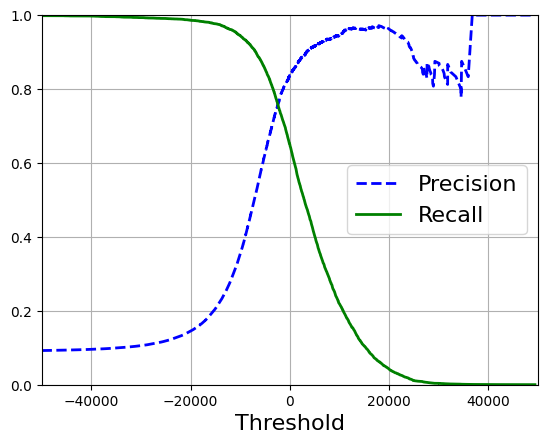

In [ ]:
plot_precision_recall_vs_threshold(precision, recall, threadholds)

Text(0, 0.5, 'precision')

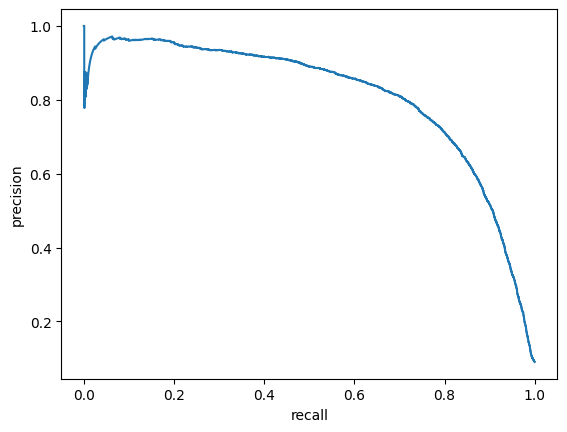

In [ ]:
plt.plot(recall,precision)
plt.xlabel("recall")
plt.ylabel("precision")

In [ ]:
precision

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
idx_max_first = np.argmax(precision >= 0.9) # argmax最大值的第一次出现

In [ ]:
thread_90 = threadholds[idx_max_first]

In [ ]:
thread_90

3370.0194991439557

In [ ]:
is5_train_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
is5_train_predict_90perct = is5_train_scores > thread_90

In [ ]:
is5_train_predict_90perct

array([False, False, False, ...,  True, False, False])

In [ ]:
is5_train_predict_90perct

array([False, False, False, ...,  True, False, False])

In [ ]:
is5_train_predict_90perct[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
precision_score(is5_train_target, is5_train_predict_90perct)

0.9

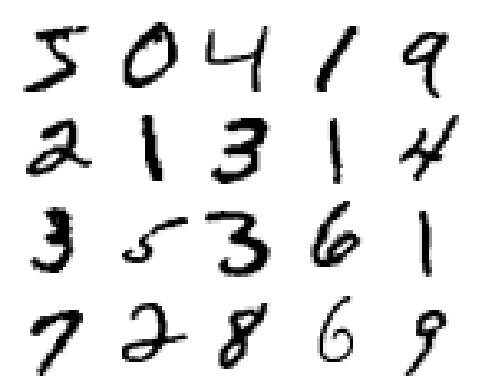

In [ ]:
plot_digits(train_data[:20],5)

In [ ]:
recall_score(is5_train_target, is5_train_predict_90perct) # 一半不到的召回率

0.47980077476480354

In [ ]:
n12 = pick_and_show_a_digit(12)

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()

In [ ]:
svm_classifier.fit(train_data, train_target)

In [ ]:
svm_classifier.predict([n3])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

In [ ]:
svm_classifier.decision_function([n3])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-0.30461154,  9.31250893,  6.25161472,  4.80442191,  4.82807564,
         1.72567445,  0.71707527,  8.26892742,  6.28488102,  2.72424781]])

In [13]:
svm_classifier.classes_

NameError: name 'svm_classifier' is not defined

In [ ]:
sgd_classifer_multi = SGDClassifier(random_state=42)

In [ ]:
sgd_classifer_multi.fit(train_data, train_target)

SGDClassifier(random_state=42)

In [ ]:
sgd_classifer_multi.predict([n3])
sgd_classifer_multi.predict([n1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['1'], dtype='<U1')

In [ ]:
noise = np.random.randint(0,100,(len(train_data),28*28))

In [ ]:
train_data_with_noise = train_data + noise

In [ ]:
noise = np.random.randint(0,100,(len(train_data),28*28))

In [ ]:
train_target_with_noise = train_data

In [ ]:
n3_score = svm_classifier.decision_function([n3])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
n3_score

array([[-0.30461154,  9.31250893,  6.25161472,  4.80442191,  4.82807564,
         1.72567445,  0.71707527,  8.26892742,  6.28488102,  2.72424781]])

In [ ]:
np.argmax(n3_score)

1

In [ ]:
show_a_digit(n3)

In [ ]:
sgd_clf_ret = cross_val_score(sgd_clf, train_data, train_target, cv=3, scoring="accuracy")

In [ ]:
sgd_clf_ret

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.astype(np.float64))
sgd_clf_ret_scaled = cross_val_score(sgd_clf, train_data_scaled, train_target, cv=3, scoring="accuracy")

In [ ]:
sgd_clf_ret_scaled

array([0.8983, 0.891 , 0.9018])